In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from scipy import stats
import math
import sys
import re

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score, recall_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout

# Install 'category_encoders' if not already done
# !pip install category-encoders
import category_encoders as ce

# Additional imports for color settings and profiling
plt.style.use('seaborn-dark-palette')
plt.rcParams["figure.figsize"] = [16, 8]
width = 1000
height = 750
bg_color = '#FFFFFF'
paper_bg = '#FFFFFF'
plt.rcParams.update({'font.size': 18})
color_charts = '#2baae2'
color = '#16171f'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color
plt.rcParams['xtick.color'] = color
plt.rcParams['ytick.color'] = color
plt.rcParams.update({'text.color': color, 'axes.labelcolor': color})
plt.rcParams.update({'font.size': 17})
plt.rc('font', size=17)

from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.inspection import permutation_importance
from sklearn.metrics import balanced_accuracy_score




C:\Users\User\AppData\Local\Temp\ipykernel_11136\902373853.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
class pipeline_churn_prediction():
    def __init__(self):
        self.project = 'churn prediction '
        
    def get_percent_missing(self, df):
        percent_missing = df.isnull().sum() * 100 / len(df)
        missing_value_df = pd.DataFrame({'column_name': df.columns,
                                             'percent_missing': percent_missing})
        missing_value_df.sort_values('percent_missing', inplace=True)
        percent_missing = df.isnull().sum() * 100 / len(df)
        
        print('Percentage of Missing Values: ')

        return percent_missing

In [5]:
plt.rcParams["figure.figsize"] = [16, 8]
pipeline_churn_diego = pipeline_churn_prediction()

df_train = pd.read_csv('train.csv')
print(df_train.shape[0])
print(len(df_train.columns.tolist()))
df_train.head(1)

4250
20


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,no


In [6]:
# Checking the missing values 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
pipeline_churn_diego.get_percent_missing(df_train)

Percentage of Missing Values: 


state                            0.0
account_length                   0.0
area_code                        0.0
international_plan               0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churn                            0.0
dtype: float64

In [8]:
# Display the head of the data
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [10]:
df_test = pd.read_csv('test.csv')
print('Train shape {}'.format(df_train.shape))
print('Test shape {}'.format(df_test.shape))

# Checking the missing values 
# Checking the missing values 
df_train.info()

Train shape (4250, 20)
Test shape (750, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  tota

In [11]:
# Describe the string data
df_train.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [12]:
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].map(lambda x: x.strip())
df_train['international_plan'] = df_train['international_plan'].map(lambda x: x.strip())
df_train['churn'] = df_train['churn'].map(lambda x: x.strip())

df_train = df_train.replace('yes', 1)
df_train = df_train.replace('no', 0)

df_train['area_code'] = df_train['area_code'].str.replace('area_code_', '')
df_train['area_code'] = df_train['area_code'].astype(np.int16)

# Drop some useless columns
to_drop = ['state','area_code']
df_train = df_train.drop(to_drop, axis=1)

In [13]:
df_test['voice_mail_plan'] = df_test['voice_mail_plan'].map(lambda x: x.strip())
df_test['international_plan'] = df_test['international_plan'].map(lambda x: x.strip())

df_test = df_test.replace('yes', 1)
df_test = df_test.replace('no', 0)

df_test['area_code'] = df_test['area_code'].str.replace('area_code_', '')
df_test['area_code'] = df_test['area_code'].astype(np.int16)

# Drop some useless columns
to_drop = ['state','area_code']
df_test = df_test.drop(to_drop, axis=1)

id_sub = df_test.id

df_test_ = df_test.drop(df_test.columns[0],axis=1)
df_test_

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,73,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [25]:
pip install pandas-profiling



                                              0.0/262.6 kB ? eta -:--:--
     -----                                 41.0/262.6 kB 653.6 kB/s eta 0:00:01
     ----------------------                 153.6/262.6 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 262.6/262.6 kB 1.8 MB/s eta 0:00:00
                                              0.0/309.8 kB ? eta -:--:--
     -------------                          112.6/309.8 kB 6.4 MB/s eta 0:00:01
     -------------------------------------- 309.8/309.8 kB 4.8 MB/s eta 0:00:00
                                              0.0/102.4 kB ? eta -:--:--
     -------------------------------------- 102.4/102.4 kB 5.8 MB/s eta 0:00:00
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: joblib


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.
ydata-profiling 4.6.1 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


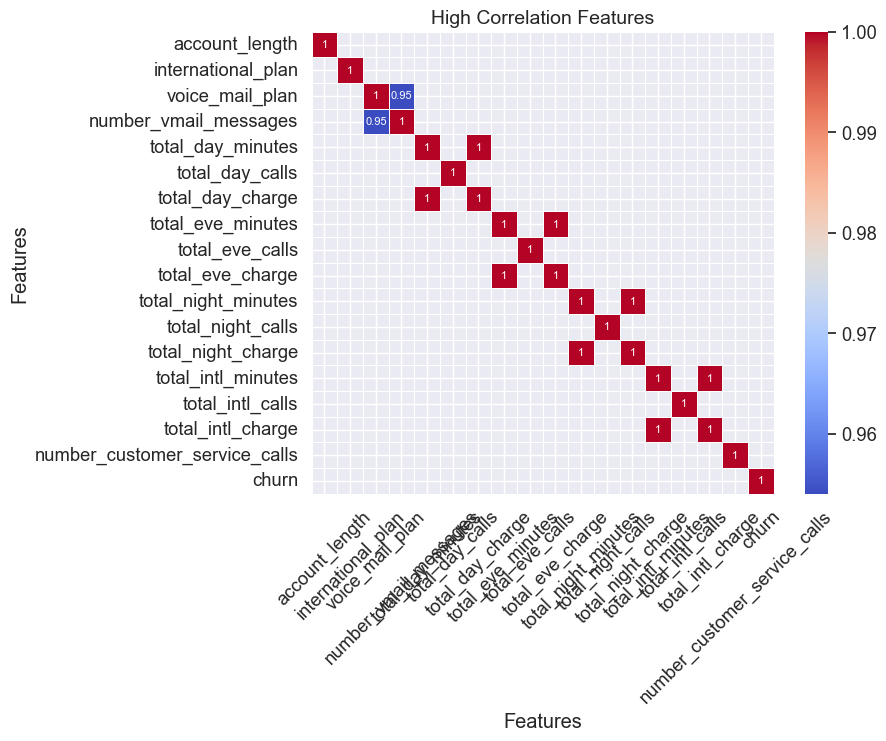

In [27]:
# calculate correlation and filter for high correlation
corr = df_train.corr()
high_corr = corr[abs(corr) > 0.6]

# create heatmap with improved style
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(high_corr, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=.5, cbar=True, square=True, ax=ax)
ax.set_title('High Correlation Features', fontsize=14)
ax.set_xlabel('Features')
ax.set_ylabel('Features')
ax.tick_params(axis='x', labelrotation=45)
plt.show()

In [28]:
df_train.head(1)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [29]:
print (pearsonr(df_train['number_vmail_messages'], df_train['voice_mail_plan'])[0])

0.9540138631356921


In [30]:
# Define the function to create the LSTM model outside the class
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the LSTMClassifier class
class LSTMClassifier:
    
    """
    
    Class Created by: Diego Gustavo Hurtado Olivares
    
    LSTMClassifier is a class that provides an easy-to-use interface for training, evaluating, 
    and tuning Long Short-Term Memory (LSTM) models for binary classification tasks.
    
    This class includes methods for preprocessing data, building and training the LSTM model,
    evaluating the model using various metrics, plotting the training history and ROC curve,
    predicting new instances, saving and loading the model, and obtaining feature importances 
    using permutation importance. It also provides support for hyperparameter tuning, K-fold
    cross-validation, and early stopping.
    
    Example usage:
    --------------
    
    # Initialize the LSTMClassifier with your data
    lstm_classifier = LSTMClassifier(data)
    
    # Preprocess the data
    lstm_classifier.preprocess_data()
    
    # Build the LSTM model
    lstm_classifier.build_model()
    
    # Train the model
    history = lstm_classifier.train_model(epochs=50, batch_size=32)
    
    # Evaluate the model
    lstm_classifier.evaluate_model()
    
    # Plot the training history and ROC curve
    lstm_classifier.plot_training_history(history)
    lstm_classifier.plot_roc_curve()
    
    # Predict new instances
    y_pred = lstm_classifier.predict(X_new)
    
    """
    
    def __init__(self, data):
        # Initialize the data path and variables to store the data, train and test sets, and model
        # self.data_path = data_path
        self.data = data
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = None
        self.model = None
        
    def load_data(self):
        # Load the data from the specified path
        self.data = pd.read_csv(self.data_path)
        
    def preprocess_data(self):
        # Split the data into features (X) and target (y)
        X = self.data.drop(["churn"], axis=1)
        y = self.data["churn"]
        
        # Split the data into train and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Standardize the features
        self.scaler = StandardScaler()
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)
        
        # Reshape the features to be 3D arrays suitable for input into an LSTM model
        self.X_train = np.reshape(self.X_train, (self.X_train.shape[0], 1, self.X_train.shape[1]))
        self.X_test = np.reshape(self.X_test, (self.X_test.shape[0], 1, self.X_test.shape[1]))
        
    def build_model(self):
        # Create a sequential model with two LSTM layers, two dropout layers, and a dense output layer
        self.model = Sequential()
        self.model.add(LSTM(64, input_shape=(1, self.X_train.shape[2]), return_sequences=True))
        self.model.add(Dropout(0.2))
        self.model.add(LSTM(32))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(1, activation='sigmoid'))
        # Compile the model with the binary crossentropy loss function, the Adam optimizer, and accuracy metrics
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    def early_stopping(self, patience=10, restore_best_weights=True):
        return EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=restore_best_weights)
    
    def custom_metric(self, y_true, y_pred):
        # Example: Implement the balanced accuracy metric
        balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
        return balanced_accuracy
    
        
    def evaluate_model(self, use_custom_metric=True):
        y_pred_prob = self.model.predict(self.X_test)
        y_pred_rounded = np.round(y_pred_prob)
        y_pred = y_pred_rounded.astype(int).ravel()

        # Evaluation metrics
        confusion_mat = confusion_matrix(self.y_test, y_pred)
        classification_re = classification_report(self.y_test, y_pred)
        accuracy = accuracy_score(self.y_test, y_pred)
        f1 = f1_score(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred)

        # Print the evaluation metrics
        print("Confusion Matrix:")
        print(confusion_mat)
        print("Classification Report:")
        print(classification_re)
        print("Accuracy:", accuracy)
        print("F1 Score:", f1)
        print("Recall:", recall)

        if use_custom_metric:
            custom_metric_value = self.custom_metric(self.y_test, y_pred)
            print("Custom Metric Value (Balanced Accuracy):", custom_metric_value)
        
    def plot_training_history(self, history):
        # Plot training & validation accuracy values
        plt.figure(figsize=(12, 5))
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

        # Plot training & validation loss values
        plt.figure(figsize=(12, 5))
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

    def plot_roc_curve(self):
        y_pred_prob = self.model.predict(self.X_test).ravel()
        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_prob)
        auc_score = auc(fpr, tpr)

        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()
        
    def predict(self, X):
        # Preprocess input
        X_scaled = self.scaler.transform(X)
        X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))
        
        # Make predictions
        y_pred_prob = self.model.predict(X_reshaped)
        y_pred_rounded = np.round(y_pred_prob)
        y_pred = y_pred_rounded.astype(int).ravel()
        return y_pred

    def save_model(self, model_path):
        self.model.save(model_path)

    def load_model(self, model_path):
        self.model = load_model(model_path)

    def get_model_summary(self):
        self.model.summary()
        
    def tune_hyperparameters(self, param_grid, cv=5, search_type='grid', n_iter=None, random_state=42):
        input_shape = (1, self.X_train.shape[2])

        # Wrap the model for use with scikit-learn
        model = KerasClassifier(build_fn=lambda: create_lstm_model(input_shape), verbose=0)

        if search_type == 'grid':
            search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
        elif search_type == 'random':
            if n_iter is None:
                raise ValueError("n_iter must be specified for random search.")
            search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=cv,
                                        n_iter=n_iter, random_state=random_state)

        search_result = search.fit(self.X_train, self.y_train)

        # Print the best score and best parameters
        print("Best score: %f using %s" % (search_result.best_score_, search_result.best_params_))
        return search_result

    def k_fold_cross_validation(self, n_splits=5, epochs=50, batch_size=32):
        input_shape = (1, self.X_train.shape[2])

        # Define a function to create the model with the proper input shape
        def create_model():
            return create_lstm_model(input_shape)

        # Wrap the model for use with scikit-learn
        model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

        # Perform k-fold cross-validation
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        results = cross_val_score(model, self.X_train, self.y_train, cv=kfold)

        # Print the mean and standard deviation of the cross-validation scores
        print("Cross-Validation Accuracy: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

    def model_to_json(self):
        model_json = self.model.to_json()
        return model_json

    def json_to_model(self, model_json):
        self.model = model_from_json(model_json)
        
    def predict_proba(self, X):
        X_scaled = self.scaler.transform(X)
        X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))
        y_pred_prob = self.model.predict(X_reshaped)
        return y_pred_prob

    def train_val_split(self, val_size=0.1, random_state=42):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X_train, self.y_train, test_size=val_size, random_state=random_state)

        # Reshape X_val using the same number of features as in X_train and X_test
        self.X_val = np.reshape(self.X_val, (self.X_val.shape[0], 1, self.X_train.shape[2]))


    def learning_rate_reduction(self, factor=0.1, patience=10, min_lr=1e-5):
        return ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, min_lr=min_lr)

    def train_model(self, epochs, batch_size, use_early_stopping=True, use_lr_reduction=True):
        callbacks = []
        if use_early_stopping:
            callbacks.append(self.early_stopping())
        if use_lr_reduction:
            callbacks.append(self.learning_rate_reduction())

        history = self.model.fit(self.X_train, self.y_train, epochs=epochs, batch_size=batch_size,
                                 validation_data=(self.X_test, self.y_test), callbacks=callbacks)
        return history
    
    def get_feature_importance(self, X, y, n_repeats=10, random_state=42):
        # Wrap the predict_proba method for use with sklearn's permutation_importance function
        def predict_proba_wrapped(X):
            return self.predict_proba(X)

        # Compute the permutation importance
        result = permutation_importance(predict_proba_wrapped, X, y, n_repeats=n_repeats,
                                        random_state=random_state, n_jobs=-1)

        # Combine the feature importances and their names into a dataframe and sort by importance
        feature_importance = pd.DataFrame({'feature': self.data.drop(["churn"], axis=1).columns,
                                           'importance': result.importances_mean,
                                           'std': result.importances_std})

        feature_importance = feature_importance.sort_values(by='importance', ascending=False)

        return feature_importance

In [31]:
# Instantiate the LSTMClassifier
lstm_classifier = LSTMClassifier(df_train)

# Preprocess the data
lstm_classifier.preprocess_data()

# Split the training data into training and validation sets
lstm_classifier.train_val_split()

# Build the model
lstm_classifier.build_model()

# Train the model with early stopping and learning rate reduction
history = lstm_classifier.train_model(epochs=1000, batch_size=64)

Epoch 1/1000
48/48 [==============================] - 6s 30ms/step - loss: 0.6382 - accuracy: 0.8173 - val_loss: 0.5600 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 2/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.4381 - accuracy: 0.8745 - val_loss: 0.3479 - val_accuracy: 0.8635 - lr: 0.0010
Epoch 3/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.3137 - accuracy: 0.8670 - val_loss: 0.3138 - val_accuracy: 0.8729 - lr: 0.0010
Epoch 4/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.2866 - accuracy: 0.8778 - val_loss: 0.2944 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 5/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.2668 - accuracy: 0.8876 - val_loss: 0.2723 - val_accuracy: 0.8988 - lr: 0.0010
Epoch 6/1000
48/48 [==============================] - 0s 6ms/step - loss: 0.2483 - accuracy: 0.9088 - val_loss: 0.2557 - val_accuracy: 0.9047 - lr: 0.0010
Epoch 7/1000
48/48 [==============================] - 0s 7ms/step - l

48/48 [==============================] - 0s 7ms/step - loss: 0.1271 - accuracy: 0.9601 - val_loss: 0.1637 - val_accuracy: 0.9494 - lr: 0.0010
Epoch 54/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.1339 - accuracy: 0.9562 - val_loss: 0.1636 - val_accuracy: 0.9482 - lr: 0.0010
Epoch 55/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.1255 - accuracy: 0.9588 - val_loss: 0.1636 - val_accuracy: 0.9459 - lr: 0.0010
Epoch 56/1000
48/48 [==============================] - 0s 6ms/step - loss: 0.1252 - accuracy: 0.9601 - val_loss: 0.1629 - val_accuracy: 0.9471 - lr: 0.0010
Epoch 57/1000
48/48 [==============================] - 0s 6ms/step - loss: 0.1262 - accuracy: 0.9592 - val_loss: 0.1640 - val_accuracy: 0.9482 - lr: 0.0010
Epoch 58/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.1224 - accuracy: 0.9624 - val_loss: 0.1607 - val_accuracy: 0.9494 - lr: 0.0010
Epoch 59/1000
48/48 [==============================] - 0s 6ms/step - loss: 0.1

In [32]:
# Tune hyperparameters
param_grid = {
    'epochs': [25, 50],
    'batch_size': [32, 64]
}


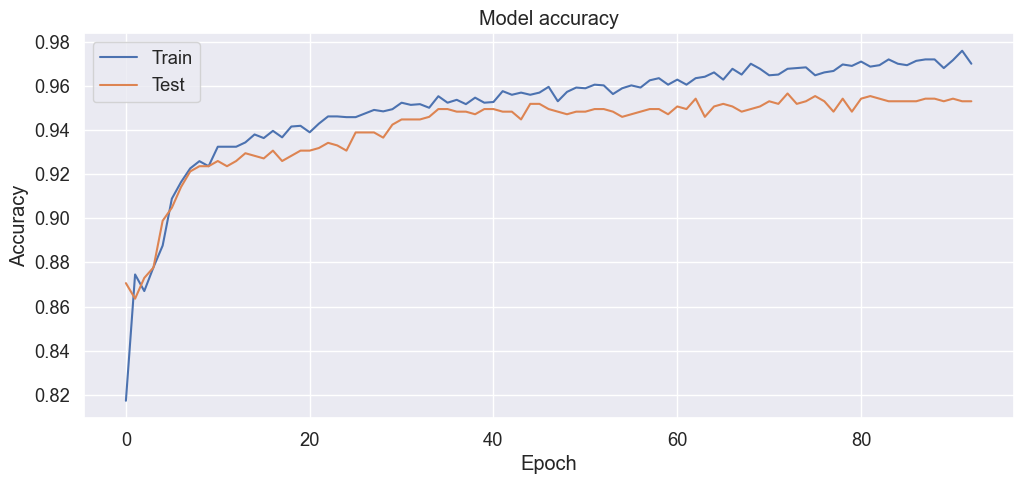

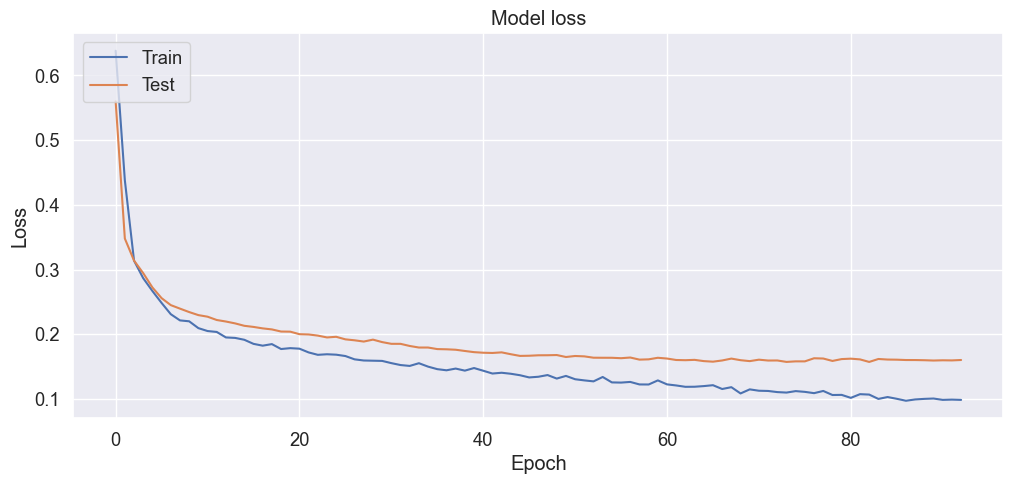

In [33]:
# Plot the training history
lstm_classifier.plot_training_history(history)

In [34]:
# Evaluate the model
lstm_classifier.evaluate_model()

27/27 [==============================] - 1s 2ms/step
Confusion Matrix:
[[710  11]
 [ 28 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       721
           1       0.90      0.78      0.84       129

    accuracy                           0.95       850
   macro avg       0.93      0.88      0.91       850
weighted avg       0.95      0.95      0.95       850

Accuracy: 0.9541176470588235
F1 Score: 0.8381742738589212
Recall: 0.7829457364341085
Custom Metric Value (Balanced Accuracy): 0.8838445741809933


27/27 [==============================] - 0s 2ms/step


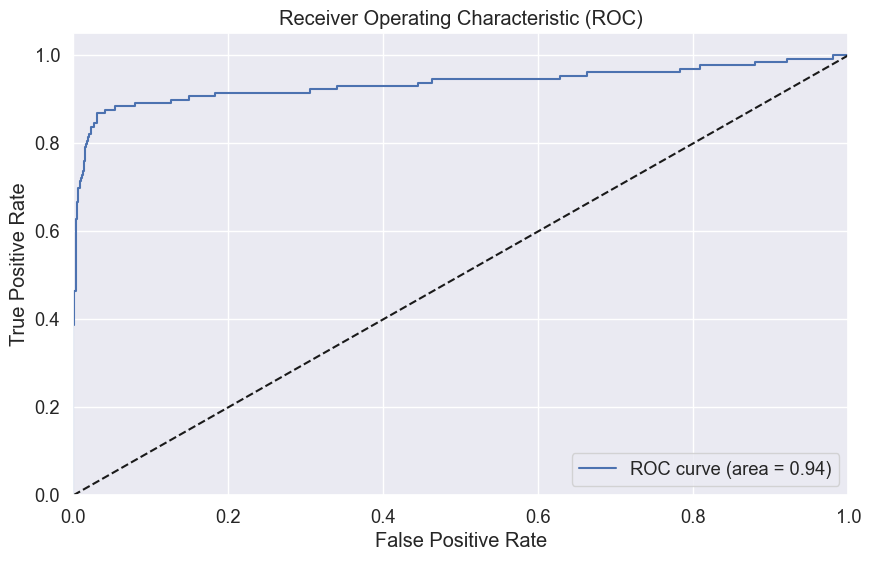

In [35]:
# Plot the ROC curve
lstm_classifier.plot_roc_curve()

In [36]:
df_test.head(1)

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1


In [37]:
y_pred_prob = lstm_classifier.predict_proba(df_test_)

24/24 [==============================] - 0s 2ms/step


In [38]:
predicted = lstm_classifier.predict(df_test_)

24/24 [==============================] - 0s 2ms/step


In [39]:
submission = pd.DataFrame({'id':id_sub, 'churn':predicted})
submission.head(5)

,id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [40]:
submission.churn.replace([0,1],['no','yes'], inplace=True)

In [41]:
submission

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [42]:
submission.to_csv('submission.csv',index=False)